# Prediction Using Supervised ML

This is a simple linear regression task, involves with 2 variables and we will predict the percentage of student marks expected to score based on number of hours.
Here the task to predict the score if a student studies for 9.25 hours per day.

Importing required libraries

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [339]:
#Reading data from given link
url = "http://bit.ly/w-data"
df=pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [285]:
#Checking shape and Dimensions
df.shape

(25, 2)

In [286]:
df.ndim

2

In [287]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [288]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [289]:
#Finding null and duplicate values

In [290]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [291]:
df.duplicated().sum()

0

In [292]:
#Visualising the relationship of given data

In [293]:
x=df['Hours']
y=df['Scores']

Text(0, 0.5, 'Score')

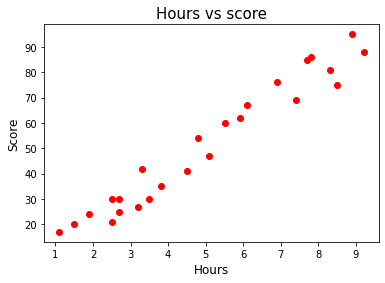

In [277]:
plt.scatter(x,y,color='r')
plt.title('Hours vs score',fontsize=15)
plt.xlabel('Hours',fontsize=12)
plt.ylabel('Score',fontsize=12)

<AxesSubplot:xlabel='Hours'>

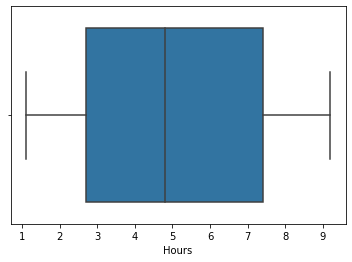

In [294]:
#Checking for outliers
sns.boxplot(df['Hours'])

<AxesSubplot:xlabel='Scores'>

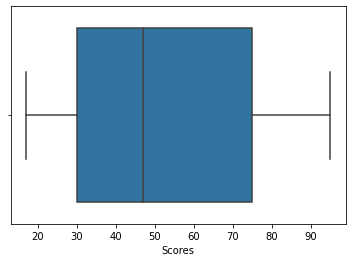

In [295]:
sns.boxplot(df['Scores'])

# Linear Regression Model

Importing models from scikit-Learn library for Machine Learning 

In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Preparing the data for train_test_split

In [297]:
X=df.iloc[:, :1].values

In [298]:
X.shape

(25, 1)

In [299]:
Y=df.iloc[:,1].values

In [300]:
Y.shape

(25,)

In [320]:
#Performing 70/30 data split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3)

In [321]:
#Checking the shape of training and testing data for further steps
X_train.shape,Y_train.shape

((17, 1), (17,))

In [322]:
X_test.shape,Y_test.shape

((8, 1), (8,))

In [323]:
#Defining model and training to make predictions
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [324]:
Y_test

array([30, 88, 27, 69, 54, 95, 35, 21], dtype=int64)

In [325]:
Y_predict = model.predict(X_test)
Y_predict

array([30.19175662, 92.67985672, 34.99853355, 75.37545977, 50.38021973,
       89.79579056, 40.76666587, 28.26904584])

In [326]:
m=model.coef_
m

array([9.61355386])

In [327]:
c=model.intercept_
c

4.235161189508865

Making regression line

In [328]:
reg_line=m*X+c

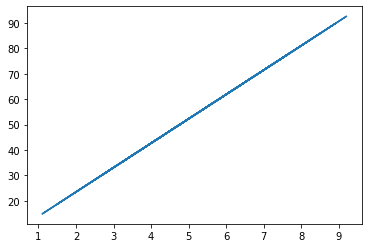

In [329]:
plt.plot(X,reg_line)

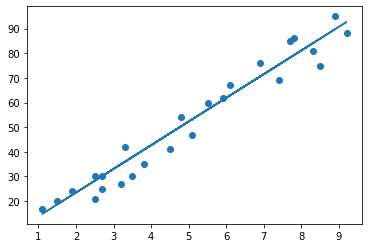

In [330]:
plt.scatter(X,Y)
plt.plot(X,reg_line)

# Model Evaluation

In [331]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [332]:
model.score(X_test,Y_test)

0.9563757114328468

In [333]:
model.score(X_train,Y_train)

0.9480904884627064

In [334]:
mean_absolute_error(Y_test,Y_predict)

5.138163509387695

In [335]:
mean_squared_error(Y_test,Y_predict)

31.6051154373936

In [336]:
#printing as dataframe with Actual and Predicting value
data=pd.DataFrame({'Actual_value':Y_test,'Predicted_value':Y_predict})
data

,Actual_value,Predicted_value
0,30,30.191757
1,88,92.679857
2,27,34.998534
3,69,75.375460
4,54,50.380220
5,95,89.795791
6,35,40.766666
7,21,28.269046


# Task- Predicting score for 9.25 hours/day

In [340]:
score=model.predict([[9.25]])
print("The Predicted Score if a student studied for 9.25 hrs/day will be",score)

The Predicted Score if a student studied for 9.25 hrs/day will be [93.16053441]
